## Observations and Insights 

In [ ]:
# Observations 1. There is a positive correlation between an increase in mouse weight and an increase in avg tumor volume. 2
#2. There were slightly more male mice than female mice in teh study. 
#3. Capomulin and Ramicane were the two drug regimens with the most mice in the study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)






In [2]:
# Display the data table for preview
mouse_metadata.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
95,f345,Infubinol,Male,23,26
96,f394,Zoniferol,Male,19,30
97,f436,Ceftamin,Female,3,25
98,f545,Zoniferol,Female,20,26


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:

# Combine the data into a single dataset

combined_data = pd.merge (mouse_metadata, study_results, how = "right", on = "Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:


# Checking the number of mice.
mouse_metadata["Mouse ID"].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouseid = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
duplicate_mouseid

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint'])]




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouseid)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

In [10]:
gender_mice = clean_data["Sex"].value_counts()
gender_mice

Male      958
Female    922
Name: Sex, dtype: int64

## Summary Statistics

In [11]:
drug_regimens = clean_data["Drug Regimen"].value_counts()
drug_regimens

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [12]:
#method one
mean = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#method one

median = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#method one
variance = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#method one

std = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
sem = clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
tumor_volume_df = pd.DataFrame({"Mean": mean,
                               "Median": median,
                               "Variance": variance,
                               "Standard Deviation": std,
                               "Standard Error of Mean": sem})

tumor_volume_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
#method two
summary_tumor_volume = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median','var','std', 'sem']})
summary_tumor_volume

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [19]:
capomulin_data = clean_data[(clean_data["Drug Regimen"]== "Capomulin")]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [20]:
capo_tumor_mean = capomulin_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
capo_tumor_mean

Drug Regimen
Capomulin    40.675741
Name: Tumor Volume (mm3), dtype: float64

In [21]:
capo_tumor_median = capomulin_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
capo_tumor_median

Drug Regimen
Capomulin    41.557809
Name: Tumor Volume (mm3), dtype: float64

In [22]:
capo_tumor_variance = capomulin_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
capo_tumor_variance

Drug Regimen
Capomulin    24.947764
Name: Tumor Volume (mm3), dtype: float64

In [23]:
capo_tumor_std_dev = capomulin_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
capo_tumor_std_dev

Drug Regimen
Capomulin    4.994774
Name: Tumor Volume (mm3), dtype: float64

In [24]:
capo_tumor_sem = capomulin_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
capo_tumor_sem

Drug Regimen
Capomulin    0.329346
Name: Tumor Volume (mm3), dtype: float64

In [25]:
ramicane_data = clean_data[(clean_data["Drug Regimen"]== "Ramicane")]
ramicane_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [26]:
ramicane_tumor_mean = ramicane_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
ramicane_tumor_mean

Drug Regimen
Ramicane    40.216745
Name: Tumor Volume (mm3), dtype: float64

In [27]:
ramicane_tumor_median = ramicane_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
ramicane_tumor_median

Drug Regimen
Ramicane    40.673236
Name: Tumor Volume (mm3), dtype: float64

In [28]:
ramicane_tumor_variance = ramicane_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
ramicane_tumor_variance

Drug Regimen
Ramicane    23.486704
Name: Tumor Volume (mm3), dtype: float64

In [29]:
ramicane_tumor_std_dev = ramicane_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
ramicane_tumor_std_dev

Drug Regimen
Ramicane    4.846308
Name: Tumor Volume (mm3), dtype: float64

In [30]:
ramicane_tumor_sem = ramicane_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
ramicane_tumor_sem

Drug Regimen
Ramicane    0.320955
Name: Tumor Volume (mm3), dtype: float64

In [31]:
Ketapril_data = clean_data[(clean_data["Drug Regimen"]== "Ketapril")]

Ketapril_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
511,a457,Ketapril,Female,11,30,0,45.000000,0
512,a457,Ketapril,Female,11,30,5,47.462891,0
513,a457,Ketapril,Female,11,30,10,49.783419,0
690,c580,Ketapril,Male,22,25,0,45.000000,0
691,c580,Ketapril,Male,22,25,5,46.628455,0
...,...,...,...,...,...,...,...,...
1819,y260,Ketapril,Female,7,25,25,54.437562,4
1820,y260,Ketapril,Female,7,25,30,58.582676,4
1821,y260,Ketapril,Female,7,25,35,59.603558,4
1822,y260,Ketapril,Female,7,25,40,60.914176,4


In [32]:
Ketapril_tumor_mean = Ketapril_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Ketapril_tumor_mean

Drug Regimen
Ketapril    55.235638
Name: Tumor Volume (mm3), dtype: float64

In [33]:
Ketapril_tumor_median = Ketapril_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Ketapril_tumor_median

Drug Regimen
Ketapril    53.698743
Name: Tumor Volume (mm3), dtype: float64

In [34]:
Ketapril_tumor_variance = Ketapril_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Ketapril_tumor_variance

Drug Regimen
Ketapril    68.553577
Name: Tumor Volume (mm3), dtype: float64

In [35]:
Ketapril_tumor_std = Ketapril_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
Ketapril_tumor_std

Drug Regimen
Ketapril    8.279709
Name: Tumor Volume (mm3), dtype: float64

In [36]:
Ketapril_tumor_sem = Ketapril_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
Ketapril_tumor_sem

Drug Regimen
Ketapril    0.60386
Name: Tumor Volume (mm3), dtype: float64

In [37]:
Naftisol_data = clean_data[(clean_data["Drug Regimen"]== "Naftisol")]

Naftisol_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
558,a818,Naftisol,Female,12,28,0,45.000000,0
559,a818,Naftisol,Female,12,28,5,45.696709,0
560,a818,Naftisol,Female,12,28,10,49.790919,0
561,a818,Naftisol,Female,12,28,15,51.227566,0
562,a818,Naftisol,Female,12,28,20,54.834624,0
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
Naftisol_tumor_mean = Naftisol_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Naftisol_tumor_mean

Drug Regimen
Naftisol    54.331565
Name: Tumor Volume (mm3), dtype: float64

In [39]:
Naftisol_tumor_median = Naftisol_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Naftisol_tumor_median

Drug Regimen
Naftisol    52.509285
Name: Tumor Volume (mm3), dtype: float64

In [40]:
Naftisol_tumor_variance = Naftisol_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Naftisol_tumor_variance

Drug Regimen
Naftisol    66.173479
Name: Tumor Volume (mm3), dtype: float64

In [41]:
Naftisol_tumor_std = Naftisol_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
Naftisol_tumor_std

Drug Regimen
Naftisol    8.134708
Name: Tumor Volume (mm3), dtype: float64

In [42]:
Naftisol_tumor_sem = Naftisol_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
Naftisol_tumor_sem

Drug Regimen
Naftisol    0.596466
Name: Tumor Volume (mm3), dtype: float64

In [43]:
Zoniferol_data = clean_data[(clean_data["Drug Regimen"]== "Zoniferol")]

Zoniferol_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
501,a401,Zoniferol,Female,8,25,0,45.000000,0
502,a401,Zoniferol,Female,8,25,5,46.111986,0
503,a401,Zoniferol,Female,8,25,10,47.725937,1
504,a401,Zoniferol,Female,8,25,15,49.934725,1
505,a401,Zoniferol,Female,8,25,20,52.204511,2
...,...,...,...,...,...,...,...,...
1719,w575,Zoniferol,Female,16,28,45,68.401286,3
1774,x613,Zoniferol,Female,2,29,0,45.000000,0
1775,x613,Zoniferol,Female,2,29,5,46.097041,0
1776,x613,Zoniferol,Female,2,29,10,46.818176,0


In [44]:
Zoniferol_tumor_mean = Zoniferol_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Zoniferol_tumor_mean

Drug Regimen
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [45]:
Zoniferol_tumor_median = Zoniferol_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Zoniferol_tumor_median

Drug Regimen
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [46]:
Zoniferol_tumor_variance = Zoniferol_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Zoniferol_tumor_variance

Drug Regimen
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [47]:
Zoniferol_tumor_std = Zoniferol_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
Zoniferol_tumor_std

Drug Regimen
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [48]:
Zoniferol_tumor_sem = Zoniferol_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
Zoniferol_tumor_sem

Drug Regimen
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


In [51]:
Stelasyn_data = clean_data[(clean_data["Drug Regimen"]== "Stelasyn")]

Stelasyn_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
494,a366,Stelasyn,Female,16,29,0,45.000000,0
495,a366,Stelasyn,Female,16,29,5,48.951368,0
496,a366,Stelasyn,Female,16,29,10,53.523990,0
497,a366,Stelasyn,Female,16,29,15,55.265582,0
498,a366,Stelasyn,Female,16,29,20,57.285987,0
...,...,...,...,...,...,...,...,...
1761,x402,Stelasyn,Male,21,28,35,55.240962,3
1762,x402,Stelasyn,Male,21,28,40,56.691723,3
1763,x402,Stelasyn,Male,21,28,45,61.619606,3
1858,z314,Stelasyn,Female,21,28,0,45.000000,0


In [52]:
Stelasyn_tumor = Stelasyn_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"], Stelasyn_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"], Stelasyn_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"], Stelasyn_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"], Stelasyn_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
Stelasyn_tumor

(Drug Regimen
 Stelasyn    54.233149
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Stelasyn    52.431737
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Stelasyn    59.450562
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Stelasyn    7.710419
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Stelasyn    0.573111
 Name: Tumor Volume (mm3), dtype: float64)

In [53]:
Placebo_data = clean_data[(clean_data["Drug Regimen"]== "Placebo")]

Placebo_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
474,a262,Placebo,Female,17,29,0,45.000000,0
475,a262,Placebo,Female,17,29,5,48.717568,1
476,a262,Placebo,Female,17,29,10,49.595181,1
477,a262,Placebo,Female,17,29,15,53.827974,2
478,a262,Placebo,Female,17,29,20,57.013313,2
...,...,...,...,...,...,...,...,...
1829,y478,Placebo,Female,3,25,25,57.826976,1
1830,y478,Placebo,Female,3,25,30,59.374615,1
1831,y478,Placebo,Female,3,25,35,61.888027,1
1832,y478,Placebo,Female,3,25,40,65.971120,1


In [54]:
Placebo_tumor = Placebo_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"], Placebo_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"], Placebo_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"], Placebo_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"], Placebo_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
Placebo_tumor

(Drug Regimen
 Placebo    54.033581
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Placebo    52.288934
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Placebo    61.168083
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Placebo    7.821003
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Placebo    0.581331
 Name: Tumor Volume (mm3), dtype: float64)

In [55]:
Ceftamin_data = clean_data[(clean_data["Drug Regimen"]== "Ceftamin")]

Ceftamin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [56]:
Ceftamin_tumor = Ceftamin_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"], Ceftamin_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"], Ceftamin_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"], Ceftamin_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"], Ceftamin_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
Ceftamin_tumor

(Drug Regimen
 Ceftamin    52.591172
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Ceftamin    51.776157
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Ceftamin    39.290177
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Ceftamin    6.268188
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Ceftamin    0.469821
 Name: Tumor Volume (mm3), dtype: float64)

In [57]:
Infubinol_data = clean_data[(clean_data["Drug Regimen"]== "Infubinol")]

Infubinol_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [58]:
Infubinol_tumor = Infubinol_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"], Infubinol_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"], Infubinol_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"], Infubinol_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"], Infubinol_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
Infubinol_tumor

(Drug Regimen
 Infubinol    52.884795
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Infubinol    51.820584
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Infubinol    43.128684
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Infubinol    6.567243
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Infubinol    0.492236
 Name: Tumor Volume (mm3), dtype: float64)

In [59]:
Propriva_data = clean_data[(clean_data["Drug Regimen"]== "Propriva")]

Propriva_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
541,a699,Propriva,Female,5,28,0,45.000000,0
542,a699,Propriva,Female,5,28,5,46.553090,0
543,a699,Propriva,Female,5,28,10,47.867376,0
544,a699,Propriva,Female,5,28,15,49.530401,0
545,a699,Propriva,Female,5,28,20,50.712423,0
...,...,...,...,...,...,...,...,...
1741,x209,Propriva,Female,7,29,5,46.754269,0
1742,x209,Propriva,Female,7,29,10,48.929895,0
1860,z435,Propriva,Female,12,26,0,45.000000,0
1861,z435,Propriva,Female,12,26,5,47.115980,0


In [60]:
Propriva_tumor = Propriva_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"], Propriva_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"], Propriva_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"], Propriva_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"], Propriva_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
Propriva_tumor

(Drug Regimen
 Propriva    52.32093
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Propriva    50.446266
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Propriva    43.852013
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Propriva    6.622085
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Propriva    0.544332
 Name: Tumor Volume (mm3), dtype: float64)

## Bar and Pie Charts

In [61]:
drug_regimens = clean_data["Drug Regimen"].value_counts()
drug_regimens

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [62]:
mouse_count_df = pd.DataFrame({"Capomulin": [230],
                              "Ramicane": [228],
                              "Ketapril": [188],
                              "Naftisol": [186],
                              "Zoniferol": [182],
                              "Stelasyn": [181],
                              "Placebo": [181],
                              "Ceftamin": [178],
                              "Infubinol": [178],
                              "Propriva": [148]})

mouse_count_df

,Capomulin,Ramicane,Ketapril,Naftisol,Zoniferol,Stelasyn,Placebo,Ceftamin,Infubinol,Propriva
0,230,228,188,186,182,181,181,178,178,148


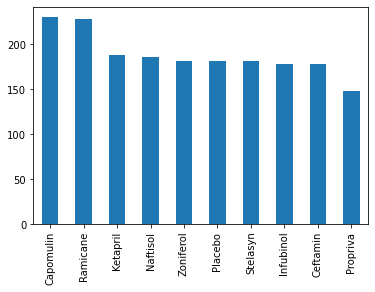

In [63]:
drug_regimens.plot(kind='bar')
plt.show()

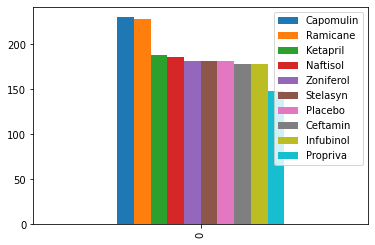

In [122]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


mouse_count_df.plot (kind='bar')

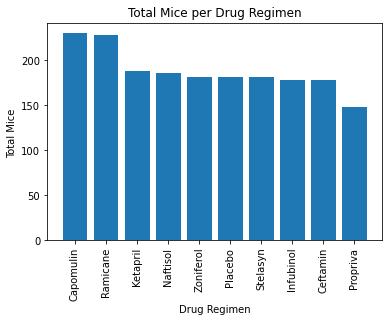

In [65]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#labels = ['Capomulin','Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn' , 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva']
#mouse_counts = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

width = 0.35
plt.bar(drug_regimens.index.values,drug_regimens.values)
plt.ylabel('Total Mice ')
plt.xlabel('Drug Regimen')
plt.title('Total Mice per Drug Regimen')
plt.xticks(rotation=90)
plt.show()



In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice = clean_data["Sex"].value_counts()
gender_mice

Male      958
Female    922
Name: Sex, dtype: int64

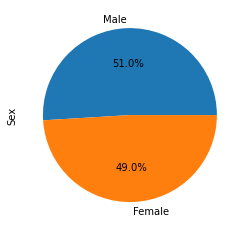

In [67]:
gender_mice.plot(kind='pie', autopct='%1.1f%%')

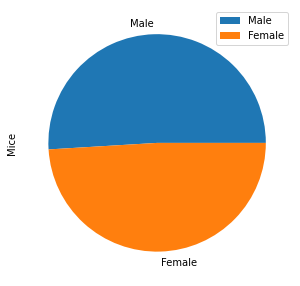

In [68]:
gender_df = pd.DataFrame({'Mice': [958,922]},
                  index=['Male','Female'])
plot = gender_df.plot.pie(y='Mice', figsize=(5, 5))

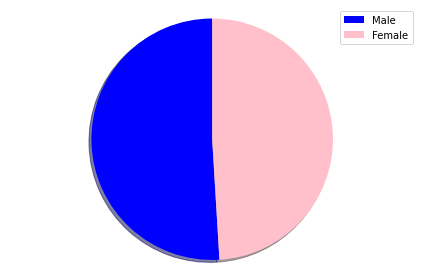

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#labels = 'Male', 'Female'
#sizes = [958,922]
colors = ['blue', 'pink']
patches, texts = plt.pie(gender_mice.values, colors=colors, shadow=True, startangle=90)
plt.legend(labels=gender_mice.index.values, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
max_time = max_time.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_df = pd.merge(max_time, clean_data, on= ['Mouse ID', 'Timepoint'], how="left")
max_time_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [71]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor= max_time_df.loc[max_time_df["Drug Regimen"]== treatment, 'Tumor Volume (mm3)']
      # add subset 
    tumor_vol_data.append(final_tumor)
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    print(outliers)
  
    
    
    # Determine outliers using upper and lower bounds


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


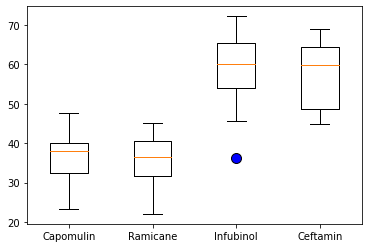

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_color = dict(markerfacecolor="blue", markersize=10)
plt.boxplot(tumor_vol_data,labels= treatment_list, flierprops=outlier_color)

plt.show()

## Line and Scatter Plots

In [73]:


capomulin_data = clean_data[(clean_data["Drug Regimen"]== "Capomulin")]
capomulin_data                          

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [74]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#m601
m601_data = clean_data.loc[(clean_data["Mouse ID"]== "m601")]

m601_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


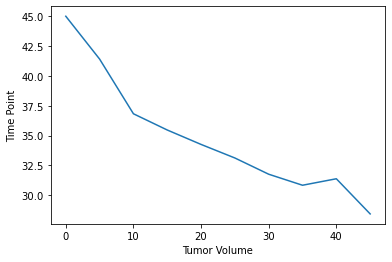

In [75]:
plt.plot(m601_data["Timepoint"], m601_data["Tumor Volume (mm3)"])
plt.xlabel('Tumor Volume')
plt.ylabel('Time Point')
plt.show()

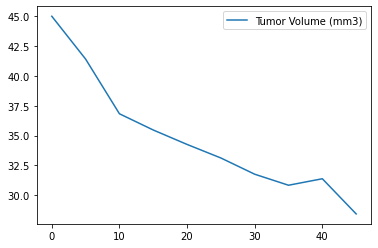

In [76]:
m601_df= pd.DataFrame({"Tumor Volume (mm3)": [45,41.408, 36.825, 35.464, 34.255, 33.118, 31.758, 30.834, 31.378, 28.430 ]}, 
                      index = [0,5,10,15,20,25,30,35,40,45])
m601_df.plot.line()

In [77]:
capomulin_avg_weight = capomulin_data.groupby(["Mouse ID"]).mean()
capomulin_avg_weight

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [78]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


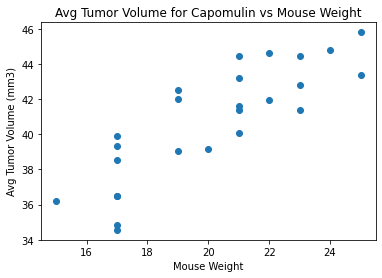

In [84]:
plt.scatter(capomulin_avg_weight['Weight (g)'], capomulin_avg_weight['Tumor Volume (mm3)'])
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Avg Tumor Volume for Capomulin vs Mouse Weight")
plt.show()

## Correlation and Regression

In [81]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [82]:
correlation = round(st.pearsonr(capomulin_avg_weight['Weight (g)'], capomulin_avg_weight['Tumor Volume (mm3)'])[0],2)
correlation

0.84

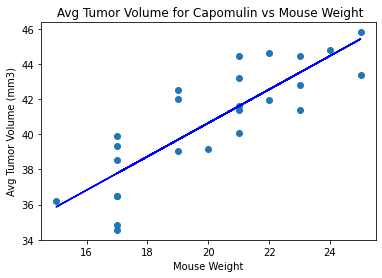

In [85]:
linear = st.linregress(capomulin_avg_weight['Weight (g)'], capomulin_avg_weight['Tumor Volume (mm3)'])
y_axis = capomulin_avg_weight['Weight (g)']*linear[0] + linear[1]
plt.scatter(capomulin_avg_weight['Weight (g)'], capomulin_avg_weight['Tumor Volume (mm3)'])
plt.plot(capomulin_avg_weight['Weight (g)'], y_axis, color ='blue')
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title(" Avg Tumor Volume for Capomulin vs Mouse Weight")
plt.show()